# Mini Jupyter Exercise #1:

__Year__ 1930 1940 1950 1960 1970 1980 1990 2000 2010

__GDP__ 1.015 1.33 2.29 3.26 4.951 6.759 9.366 13.131 15.599

| Year | GDP |
| --- | --- |
| 1930 | 1.015 |
| 1940 | 1.33 |
| 1950 | 2.29 |
| 1960 | 3.26 |
| 1970 | 4.951 |
| 1980 | 6.759 |
| 1990 | 9.366 |
| 2000 | 13.131 |
| 2010 | 15.599 |


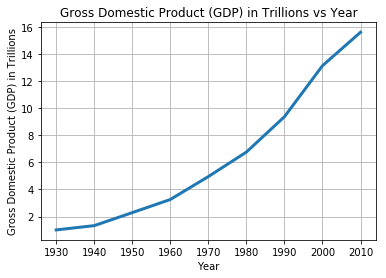

In [11]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

years = [1930,1940,1950,1960,1970,1980,1990,2000,2010]

gdp = [1.015,1.33,2.29,3.26,4.951,6.759,9.366,13.131,15.599]

plt.plot(years, gdp, linewidth=3)
plt.xlabel('Year')
plt.ylabel('Gross Domestic Product (GDP) in Trillions')
plt.title('Gross Domestic Product (GDP) in Trillions vs Year')
plt.grid(True)